![](pics/header.jpg)

# Simple Color Detection

Kevin J. Walchko, created 15 Jan 2017

---

We want to develop a simple image processing routine that will detect a given color in an image. This idea can then be expanded to detecting a pattern of colors based off a histogram model. We will also take a look at OpenCV's blob library which can help you find things.

Note that in this lesson I will show examples that work, they will not work for all images, lighting and backgrounds. You typically have to develop a robust system or things will go wrong. This lesson lays the foundation for robots tracking items (we'll look at tennis balls today) or how football draws the 1st down line in real-time on TV. The example below from the earlier days has issues, but it is pretty good today.

![](pics/football.jpg)

## References

- [Blob detection](https://www.learnopencv.com/blob-detection-using-opencv-python-c/)
- [Wikipedia HSV](https://en.wikipedia.org/wiki/HSL_and_HSV)
- [OpenCV Python documentation](http://docs.opencv.org/trunk/d6/d00/tutorial_py_root.html)
- [List of color spaces and their uses](https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses)
- [Website to understand RGB and HSV colors](http://colorizer.org/)

## Setup

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
import pylab                                 
pylab.rcParams['figure.figsize'] = (10.0, 18.0)

## Color Detection

Steps:

1. Convert image from RGB to a better colorspace, here we use HSV
1. Threshold the image between and upper lower HSV bounds
1. Use `erode` to first remove small false positives
1. Use `dilate` to close holes in the image blob.

Note, step 3 and 4 (erode then dilate) was also called openning when we talked about morphological operators earlier.

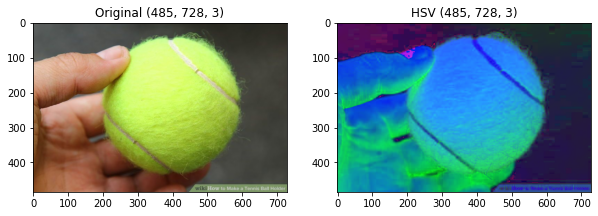

In [3]:
# read in image and convert to HSV
# im = cv2.imread('tennis/tennis_test.jpg')
im = cv2.imread('tennis/test6.jpg')
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original {}'.format(im.shape))

plt.subplot(1,2,2)
plt.imshow(hsv)
plt.title('HSV {}'.format(hsv.shape));

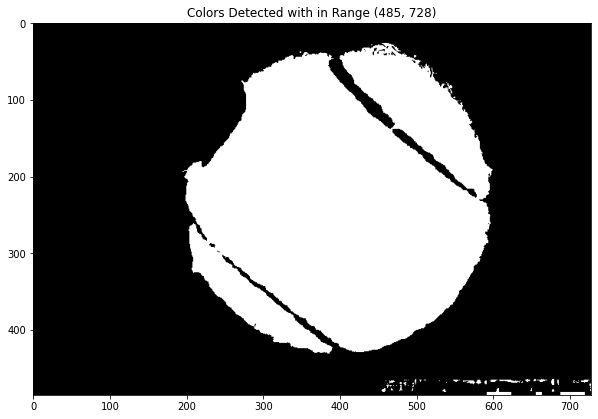

In [4]:
# find colors in range
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)
detect = cv2.inRange(hsv, greenLower, greenUpper)

plt.imshow(detect, cmap='gray')
plt.title('Colors Detected with in Range {}'.format(detect.shape));

Questions:

1. Why are we using HSV ... what value does it add to this process?
1. Did we detect anything else besides the tennis ball?
1. What could we have done to avoid that?
1. Can you see any similarity between what we are doing and how you understand a green screen to work? If so, what?

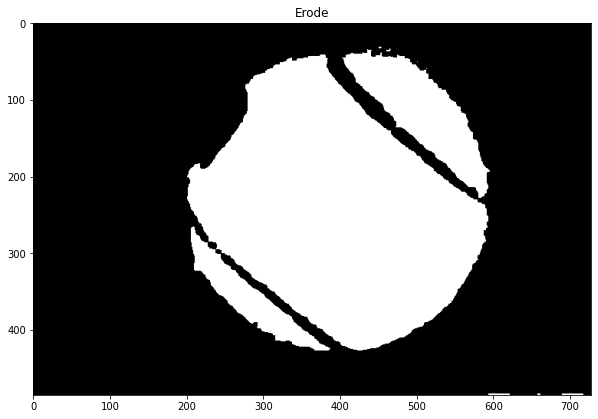

In [5]:
# get rid of stray and noisy pixels
erode = cv2.erode(detect, None, iterations=2)
plt.imshow(erode, cmap='gray')
plt.title('Erode');

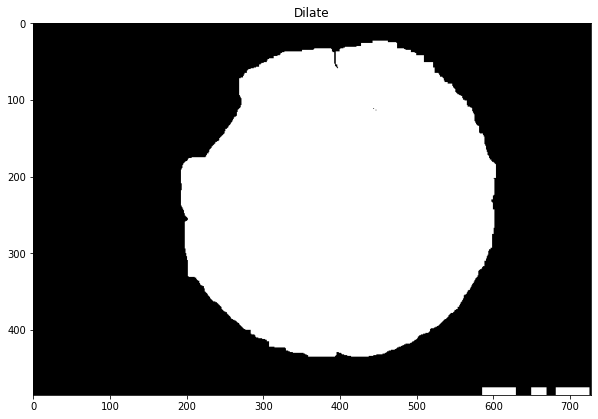

In [6]:
# close up small holes
dilate = cv2.dilate(erode, None, iterations=8)
plt.imshow(dilate, cmap='gray')
plt.title('Dilate');

mask = dilate

Notice in the first image, there are some detects in places that are not the ball ... nothing is perfect and you typically  have some small left overs to clean up. So let's find things that are circular, since this is a tennis ball and should be round.

In [7]:
# search image for contours, think lines on a contour plot. It should be easy here.
mask = dilate
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

print('Found {} objects'.format(len(cnts)))

# find the largest contour in the mask, then use
# it to compute the minimum enclosing circle and
# centroid
c = max(cnts, key=cv2.contourArea)
((x, y), radius) = cv2.minEnclosingCircle(c)
x, y, radius = int(x), int(y), int(radius)
print('Circle center: ({}, {})   radius: {} pixels'.format(x, y, radius))

Found 4 objects
Circle center: (392, 225)   radius: 217 pixels


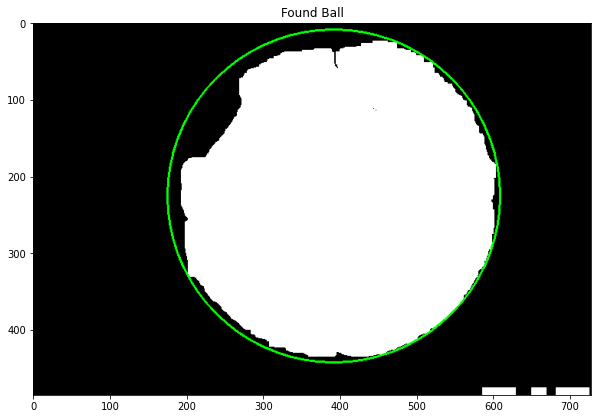

In [8]:
# now convert the image from grayscale back to color so we can
# draw colors on it ... this is only necessary for display
cmask = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)

# draw circle on image
cv2.circle(cmask,(x,y),radius,(0,255,0),2)

plt.imshow(cmask)
plt.title('Found Ball');